Aligned CA coordinates shape - AF2: (139, 3)
Aligned CA coordinates shape - AF3: (139, 3)


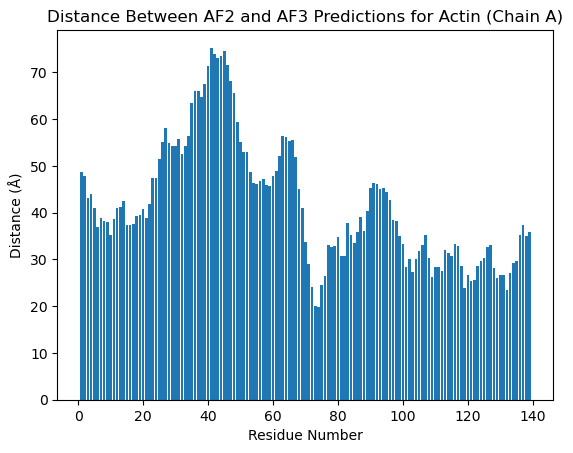

In [7]:
from Bio import PDB
import numpy as np
import matplotlib.pyplot as plt

# Load structures
af2_structure = PDB.PDBParser(QUIET=True).get_structure('AF2', 'AF2.pdb')
af3_structure = PDB.MMCIFParser(QUIET=True).get_structure('AF3', 'AF3.cif')

# Use the correct chain identifiers
af2_chain = af2_structure[0]['A']  # Adjust if necessary
af3_chain = af3_structure[0]['A']  # Adjust based on your findings

# Extract CA coordinates and residue numbers
af2_coords = {res.id[1]: res['CA'].coord for res in af2_chain if res.has_id('CA')}
af3_coords = {res.id[1]: res['CA'].coord for res in af3_chain if res.has_id('CA')}

# Create lists for aligned coordinates
af2_aligned = []
af3_aligned = []

# Align based on residue numbers
for res_num in af2_coords:
    if res_num in af3_coords:
        af2_aligned.append(af2_coords[res_num])
        af3_aligned.append(af3_coords[res_num])

af2_aligned = np.array(af2_aligned)
af3_aligned = np.array(af3_aligned)

# Check if both arrays have the same shape
print("Aligned CA coordinates shape - AF2:", af2_aligned.shape)
print("Aligned CA coordinates shape - AF3:", af3_aligned.shape)

# Compute distances
distances = np.linalg.norm(af2_aligned - af3_aligned, axis=1)

# Create bar chart
residue_numbers = range(1, len(distances) + 1)
plt.bar(residue_numbers, distances)
plt.xlabel('Residue Number')
plt.ylabel('Distance (Å)')
plt.title('Distance Between AF2 and AF3 Predictions for Actin (Chain A)')
plt.show()
